## 1. 데이터 로딩 및 전처리

#### 라이브러리 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#### 데이터 로딩 및 전처리

In [5]:
df = pd.read_csv('AAPL_2024.csv')
df

,Price,Open,High,Low,Close,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,185.78943757371047,187.07006792285642,182.55314280656535,184.29042053222656,82488700
3,2024-01-03,182.88072651321147,184.5286619910614,182.09646131024977,182.91050720214844,58414500
4,2024-01-04,180.82578520690032,181.7589539428833,179.5650288616003,180.58753967285156,71983600
...,...,...,...,...,...,...
248,2024-12-23,254.15691915529422,255.03479114956258,252.8400883307868,254.6557159423828,40858800
249,2024-12-24,254.87518901917565,257.58862955018265,254.67565812568793,257.57867431640625,23234700
250,2024-12-26,257.56867823862046,259.47408555117545,257.0100282923795,258.39666748046875,27237100
251,2024-12-27,257.20952960207876,258.0774615569102,252.4510193654514,254.9749298095703,42355300


In [6]:
df = pd.read_csv('AAPL_2024.csv', skiprows=[1,2], index_col='Price')
df.index.name = 'Date'
df['Return'] = df['Close'].pct_change()

In [7]:
df.head()

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2024-01-02,185.789438,187.070068,182.553143,184.290421,82488700,NaN
2024-01-03,182.880727,184.528662,182.096461,182.910507,58414500,-0.007488
2024-01-04,180.825785,181.758954,179.565029,180.587540,71983600,-0.012700
2024-01-05,180.666948,181.431339,178.860172,179.862823,62303300,-0.004013
2024-01-08,180.766224,184.250716,180.180517,184.210999,59144500,0.024175


In [8]:
# 결측치 확인

df.isnull().sum() # 수익률은 전일 대비 변화율로 계산되므로 첫 행에는 기준일이 없어 결측치가 발생

Open      0
High      0
Low       0
Close     0
Volume    0
Return    1
dtype: int64

## 2. 탐색적 데이터 분석 (EDA)

#### 시가(Open), 종가(Close) 시계열 추이

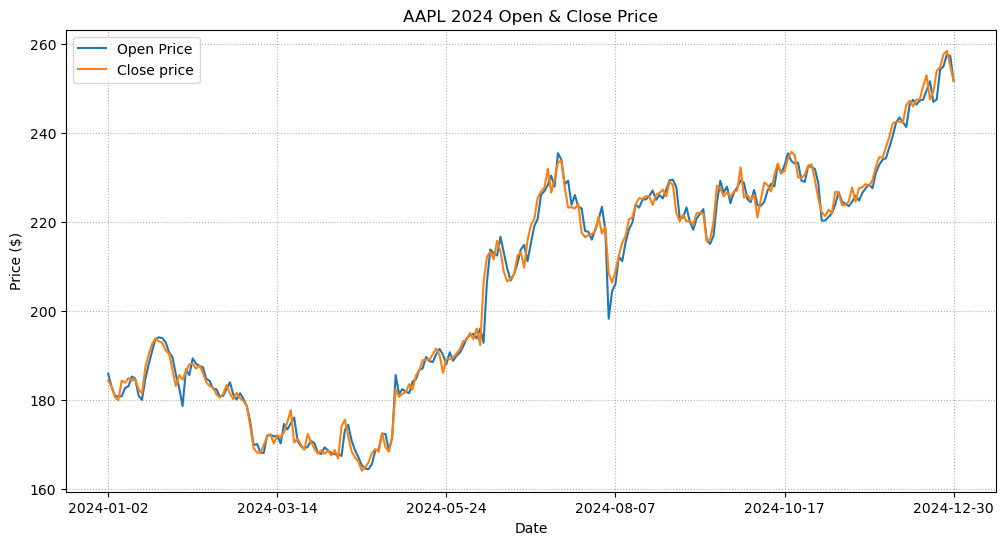

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Open'], label = 'Open Price')
plt.plot(df.index, df['Close'], label = 'Close price')
plt.title('AAPL 2024 Open & Close Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')

small_ticks = df.index[::50]
plt.xticks(small_ticks)

plt.grid(linestyle = ':')
plt.legend(loc = 'best')

plt.show()

#### 거래량/Return 시계열 추이

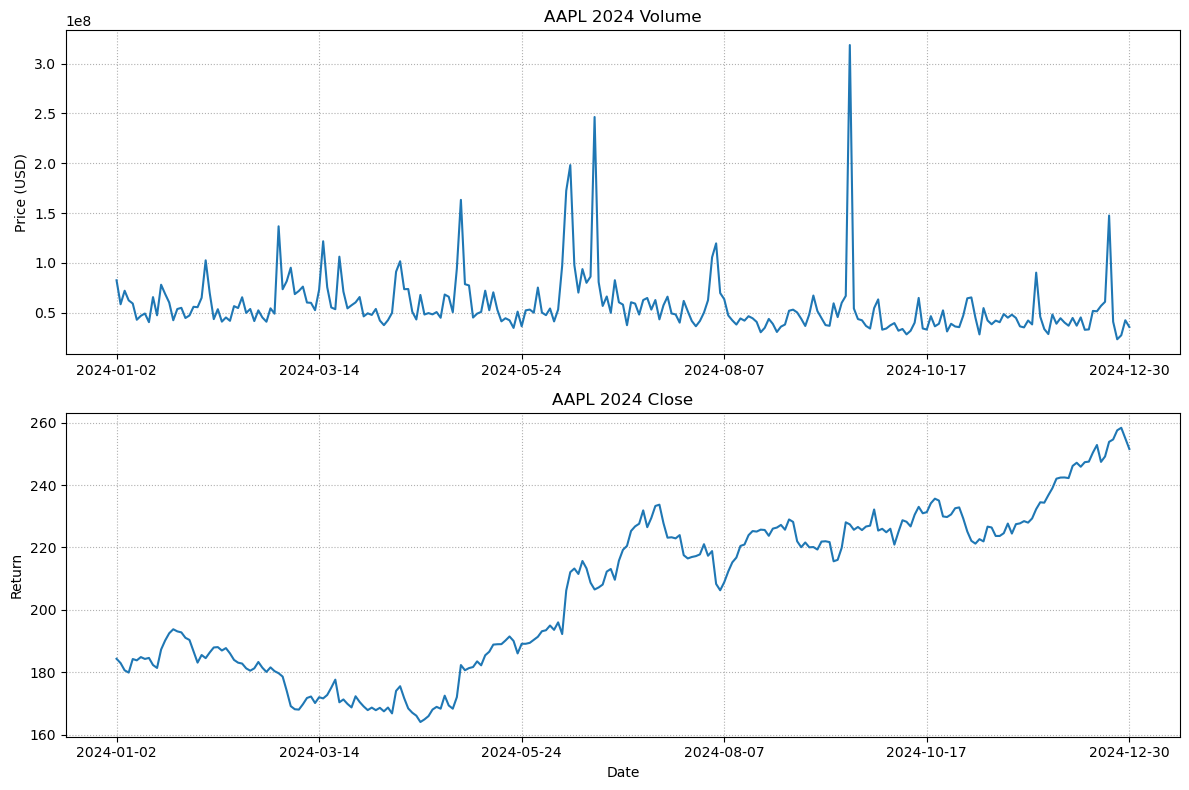

In [13]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(df.index, df['Volume'])
plt.title('AAPL 2024 Volume')
plt.ylabel("Price (USD)")

small_ticks = df.index[::50]
plt.xticks(small_ticks)

plt.grid(linestyle=':')

plt.subplot(2,1,2)
plt.plot(df.index, df['Close'])
plt.title('AAPL 2024 Close')
plt.xlabel("Date")
plt.ylabel("Return")

small_ticks = df.index[::50]
plt.xticks(small_ticks)
plt.grid(linestyle=':')

plt.tight_layout()
plt.show()

#### Daily High-Low 주가 변동폭

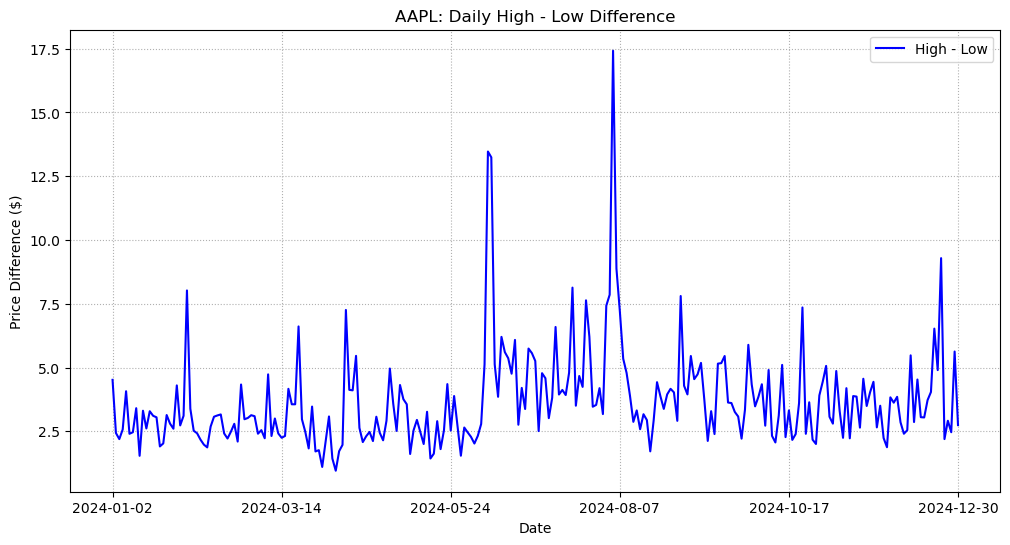

In [15]:
df["High_Low_Diff"] = df["High"] - df["Low"]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["High_Low_Diff"], label="High - Low", color="blue")
plt.title("AAPL: Daily High - Low Difference")
plt.xlabel("Date")
plt.ylabel("Price Difference ($)")

small_ticks = df.index[::50]
plt.xticks(small_ticks)

plt.grid(linestyle = ":")
plt.legend()

plt.show()

#### 종가(Close) vs 이동평균(MA)

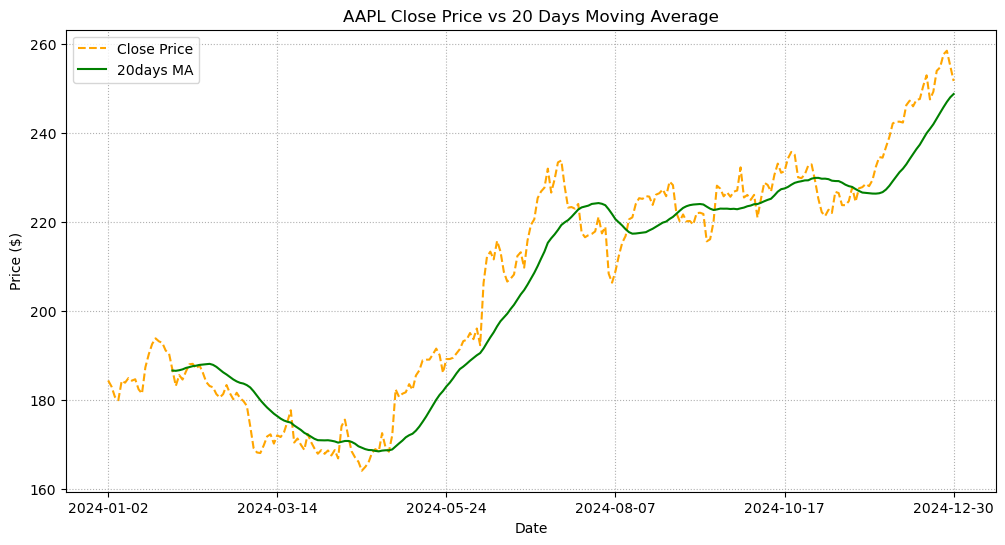

In [17]:
df['MA20'] = df['Close'].rolling(window=20).mean() # MA 기준을 20일로 설정

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price', color='orange', linestyle='--')
plt.plot(df.index, df['MA20'], label='20days MA', color='green')
plt.title('AAPL Close Price vs 20 Days Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')

small_ticks = df.index[::50]
plt.xticks(small_ticks)

plt.grid(linestyle=':')
plt.legend(loc='best')

plt.show()

#### RSI 시계열 & 기준선

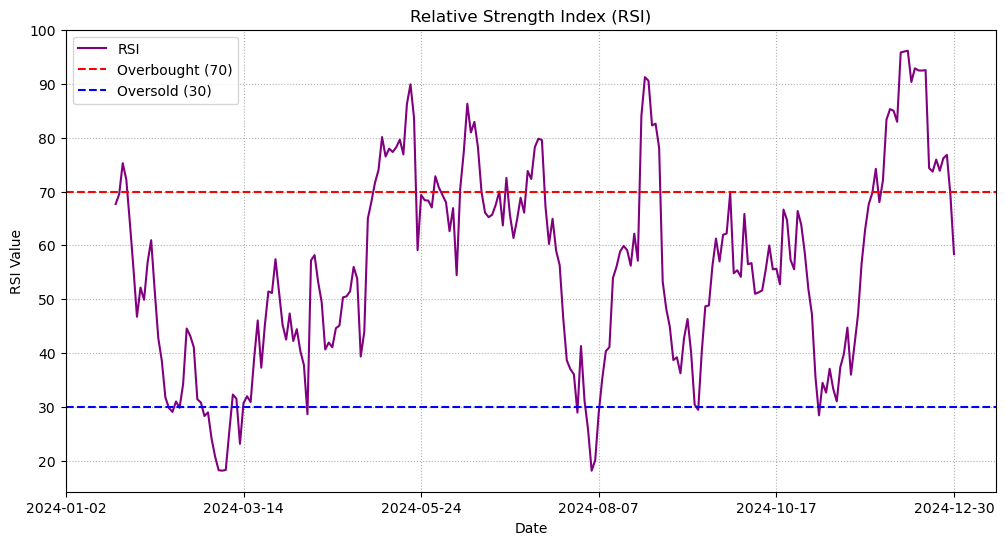

In [19]:
def rsi(Close, window=14): # RSI는 14일 기준으로 계산하는 것이 관례
    price_change = Close.diff() # 매일 가격 변동 (오늘-어제) -> 상승: 양수 / 하락: 음수
    ascend = price_change.clip(lower=0) # 상승한 날만 추출
    descend = -price_change.clip(upper=0) # 하락한 날만 추출
    avg_ascend = ascend.rolling(window=14).mean() # 평균 상승폭
    avg_descend = descend.rolling(window=14).mean() # 평균 하락폭
    rsi = 100 - ( 100 / (1 + (avg_ascend/avg_descend))) # rsi 공식
    return rsi

df['RSI'] = rsi(df['Close'], window=14)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='blue', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')

small_ticks = df.index[::50]
plt.xticks(small_ticks)

plt.grid(linestyle=':')
plt.legend(loc='best')

plt.show()

## 3. 백테스트 및 성과 평과

In [21]:
# 1. 시그널 생성
df['Signal'] = 'Hold'
buy_condition = (df['Close'] < df['MA20']) & (df['RSI'].diff() >= 0)
df.loc[buy_condition, 'Signal'] = 'Buy'

# 2. 포지션 계산 (3주 단위 보유, 최대 20일 또는 MA20 상향 시 매도)
df['Position'] = 0
shares = 0
hold_days = 0

for i in range(1, len(df)):
    if df['Signal'].iloc[i] == 'Buy' and shares == 0:
        shares = 3
        hold_days = 1
    elif shares > 0:
        hold_days += 1
        if (df['Close'].iloc[i] >= df['MA20'].iloc[i]) or (hold_days >= 20):
            shares = 0
            hold_days = 0
            df.iloc[i, df.columns.get_loc('Signal')] = 'Sell'
        else:
            df.iloc[i, df.columns.get_loc('Signal')] = 'Hold'
    df.iloc[i, df.columns.get_loc('Position')] = shares

# 3. 전략 수익률 계산
df['Next_Return'] = df['Return'].shift(-1)
df['Strategy_Return'] = df['Next_Return'] * df['Position'].shift(1)

# 4. 누적 수익률 계산
df['Cumulative_Strategy'] = (1 + df['Strategy_Return'].fillna(0)).cumprod()
df['Cumulative_BH'] = (1 + df['Return'].fillna(0)).cumprod()

# 5. 시그널 테이블 예시 보기
print(df[['Close', 'RSI', 'Signal', 'Position', 'Next_Return','Strategy_Return']].head(10))

                 Close  RSI Signal  Position  Next_Return  Strategy_Return
Date                                                                      
2024-01-02  184.290421  NaN   Hold         0    -0.007488              NaN
2024-01-03  182.910507  NaN   Hold         0    -0.012700             -0.0
2024-01-04  180.587540  NaN   Hold         0    -0.004013             -0.0
2024-01-05  179.862823  NaN   Hold         0     0.024175              0.0
2024-01-08  184.210999  NaN   Hold         0    -0.002263             -0.0
2024-01-09  183.794052  NaN   Hold         0     0.005671              0.0
2024-01-10  184.836411  NaN   Hold         0    -0.003222             -0.0
2024-01-11  184.240784  NaN   Hold         0     0.001778              0.0
2024-01-12  184.568390  NaN   Hold         0    -0.012317             -0.0
2024-01-16  182.295029  NaN   Hold         0    -0.005174             -0.0


In [22]:
# 6(1). 일별 전략 수익률
print(df['Strategy_Return'].to_string())

Date
2024-01-02         NaN
2024-01-03   -0.000000
2024-01-04   -0.000000
2024-01-05    0.000000
2024-01-08   -0.000000
2024-01-09    0.000000
2024-01-10   -0.000000
2024-01-11    0.000000
2024-01-12   -0.000000
2024-01-16   -0.000000
2024-01-17    0.000000
2024-01-18    0.000000
2024-01-19    0.000000
2024-01-22    0.000000
2024-01-23   -0.000000
2024-01-24   -0.000000
2024-01-25   -0.000000
2024-01-26   -0.000000
2024-01-29   -0.000000
2024-01-30   -0.000000
2024-01-31    0.000000
2024-02-01   -0.000000
2024-02-02    0.029540
2024-02-05    0.025895
2024-02-06    0.001743
2024-02-07   -0.000000
2024-02-08    0.000000
2024-02-09   -0.000000
2024-02-12   -0.000000
2024-02-13   -0.000000
2024-02-14   -0.000000
2024-02-15   -0.000000
2024-02-16   -0.012341
2024-02-20    0.012558
2024-02-21    0.033732
2024-02-22   -0.030102
2024-02-23   -0.022354
2024-02-26    0.024343
2024-02-27   -0.019876
2024-02-28   -0.011079
2024-02-29   -0.018091
2024-03-01   -0.076144
2024-03-04   -0.085323
2024-0

In [23]:
# 6(2). 연환산 수익률
annual_return = (1 + df['Cumulative_Strategy'].iloc[-1]) ** (252 / df['Return'].count()) - 1
print(annual_return)

1.4191606477792837


In [24]:
# 6(3). 연환산 변동성
volatility = df['Strategy_Return'].std() * np.sqrt(252)
print(volatility)

0.3530019310533281


In [25]:
# 6(4). 샤프 비율 (무위험수익률 1%)
risk_free_rate = 0.01
sharpe_ratio = (annual_return - risk_free_rate) / volatility if volatility != 0 else np.nan
print(sharpe_ratio)

3.991934671786261


In [26]:
# 6(5). 트레이딩 전략 누적수익률 비교
print(df[['Cumulative_BH','Cumulative_Strategy']].iloc[-1])

Cumulative_BH          1.365199
Cumulative_Strategy    1.402259
Name: 2024-12-30, dtype: float64


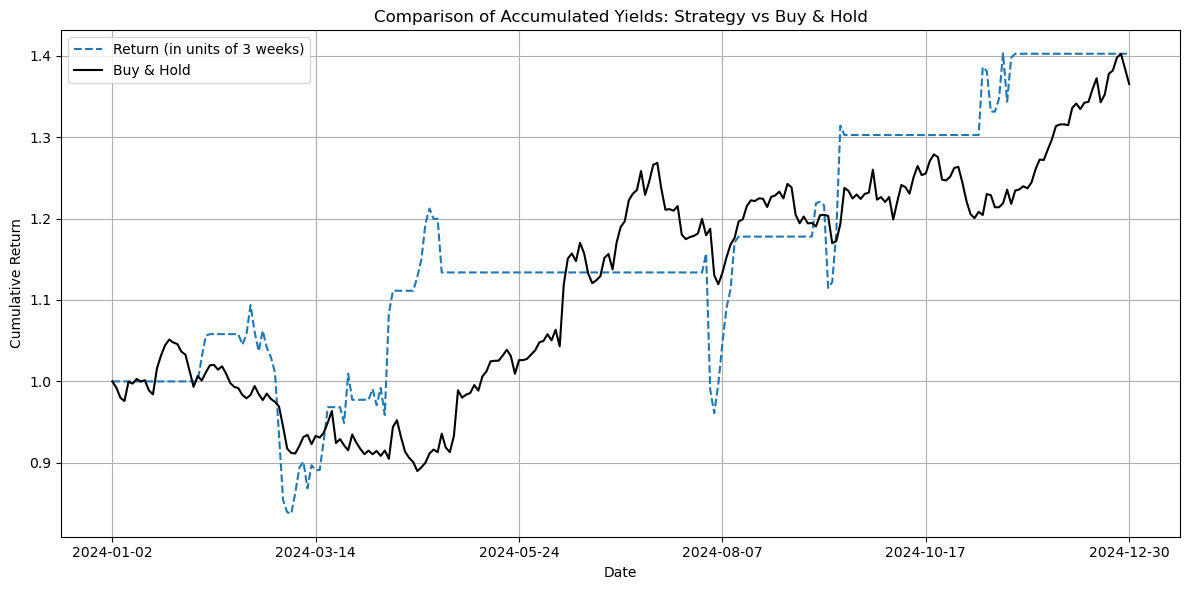

In [27]:
# 7(1). 전략별 누적 수익률 비교 차트 시각화

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_Strategy'], label='Return (in units of 3 weeks)', linestyle='--')
plt.plot(df.index, df['Cumulative_BH'], label='Buy & Hold', color='black')
plt.title('Comparison of Accumulated Yields: Strategy vs Buy & Hold')
plt.xlabel('Date')

plt.ylabel('Cumulative Return')
plt.legend()

small_ticks = df.index[::50]
plt.xticks(small_ticks)
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
# 7(2). 주요 성과 지표 요약표 시각화
cumulative_return = df['Cumulative_Strategy'].iloc[-1]
summary_df = pd.DataFrame({'Strategy': [cumulative_return, annual_return, volatility, sharpe_ratio]},
                          index=['cumulative_return', 'annual_return', 'volatility', 'sharpe_ratio'])
summary_df

,Strategy
cumulative_return,1.402259
annual_return,1.419161
volatility,0.353002
sharpe_ratio,3.991935
